In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sknn.mlp import Classifier, Layer
from sknn import ae, mlp
import numpy as np
import pandas as pd
from time import time

In [2]:
pd.set_option('display.precision', 4) 

In [3]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)

print "the shape of training set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the range of training set : %s ~ %s" %(trainX.min(),trainX.max())
print "the range of test set : %s ~ %s" %(testX.min(),testX.max())

escape time :  0.091 s
the shape of training set 5400 rows, 784 columns
the shape of test set 600 rows, 784 columns
the range of training set : 0.0 ~ 0.999996
the range of test set : 0.0 ~ 0.999996


In [13]:
score = []

for n in range(1, 20):
    # Initialize auto-encoder for unsupervised learning.
    myae = ae.AutoEncoder(
                layers=[
                ae.Layer("Tanh", units=128),
                ae.Layer("Sigmoid", units=n)],
                learning_rate=0.002,
                n_iter=2)

    t0 = time()
    # Layerwise pre-training using only the input data.
    myae.fit(trainX)

    # Transfer the weights from the auto-encoder.
    ae_trainX = myae.transform(trainX)
    ae_testX = myae.transform(testX)

    # Initialize the multi-layer perceptron with same base layers.
    mymlp = mlp.Regressor(
                layers=[
                    mlp.Layer("Rectifier", units=6),
                    mlp.Layer("Softmax")],
            verbose=1,
            learning_rate=0.009,
            n_iter=2
    )

    # Now perform supervised-learning as usual.
    
    mymlp.fit(ae_trainX, trainY)
    print "the number of unit : %s" %n
    print "escape time : ", round(time()-t0, 3), "s"

    preds = mymlp.predict(ae_testX)
    print "accuracy score : %s" %(accuracy_score(testY, preds))
    score.append(accuracy_score(testY, preds))

the number of unit : 1
escape time :  30.056 s
accuracy score : 0.165
the number of unit : 2
escape time :  31.665 s
accuracy score : 0.165
the number of unit : 3
escape time :  29.997 s
accuracy score : 0.165
the number of unit : 4
escape time :  28.718 s
accuracy score : 0.165
the number of unit : 5
escape time :  30.268 s
accuracy score : 0.165
the number of unit : 6
escape time :  29.941 s
accuracy score : 0.165
the number of unit : 7
escape time :  29.23 s
accuracy score : 0.165
the number of unit : 8
escape time :  29.639 s
accuracy score : 0.165
the number of unit : 9
escape time :  29.966 s
accuracy score : 0.165
the number of unit : 10
escape time :  29.867 s
accuracy score : 0.165
the number of unit : 11
escape time :  29.998 s
accuracy score : 0.165
the number of unit : 12
escape time :  30.624 s
accuracy score : 0.165
the number of unit : 13
escape time :  29.963 s
accuracy score : 0.165
the number of unit : 14
escape time :  30.428 s
accuracy score : 0.165
the number of un

In [14]:
df = pd.DataFrame({'Autoencoder' : score}, index=range(1, 20))

In [17]:
df.head(5)

,Autoencoder
1,0.165
2,0.165
3,0.165
4,0.165
5,0.165


In [18]:
df.describe()

,Autoencoder
count,19.000
mean,0.165
std,0.000
min,0.165
25%,0.165
50%,0.165
75%,0.165
max,0.165


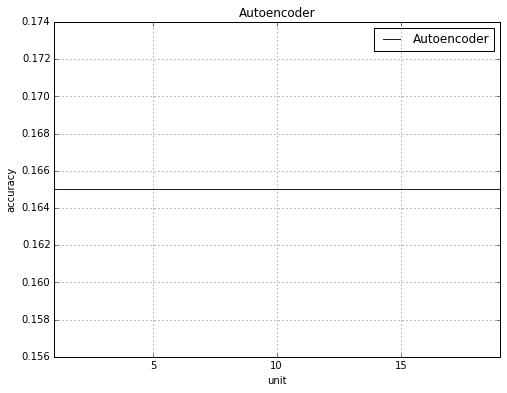

In [19]:
df.plot(title='Autoencoder', figsize=(8,6))
plt.xlabel('unit')
plt.ylabel('accuracy')

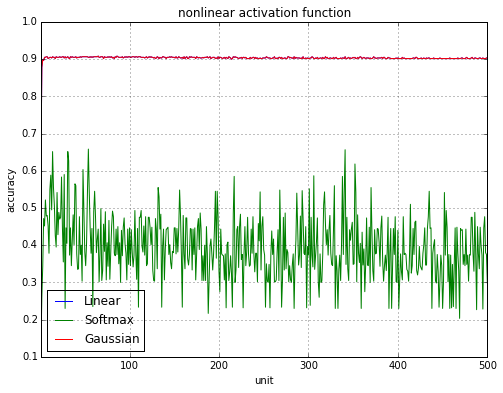

In [47]:
df[['Linear', 'Softmax', 'Gaussian']].plot(title='nonlinear activation function', figsize=(8,6))
plt.xlabel('unit')
plt.ylabel('accuracy')

In [5]:
n = 10

# Initialize auto-encoder for unsupervised learning.
myae = ae.AutoEncoder(
            layers=[
            ae.Layer("Tanh", units=784),
            ae.Layer("Tanh", units=n),
            ae.Layer("Tanh", units=784),],
            learning_rate=0.002,
            n_iter=10)

t0 = time()
# Layerwise pre-training using only the input data.
myae.fit(trainX)

# Transfer the weights from the auto-encoder.
ae_trainX = myae.transform(trainX)
ae_testX = myae.transform(testX)

# Initialize the multi-layer perceptron with same base layers.
mymlp = mlp.Regressor(
            layers=[
                mlp.Layer("Rectifier", units=n),
                mlp.Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2
)

# Now perform supervised-learning as usual.

mymlp.fit(ae_trainX, trainY)
print "the number of unit : %s" %n
print "escape time : ", round(time()-t0, 3), "s"

preds = mymlp.predict(ae_testX)
print "accuracy score : %s" %(accuracy_score(testY, preds))

the number of unit : 10
escape time :  510.894 s
accuracy score : 0.15


In [6]:
# Initialize auto-encoder for unsupervised learning.
myae = ae.AutoEncoder(
            layers=[
            ae.Layer("Tanh", units=500),
            ae.Layer("Tanh", units=250),
            ae.Layer("Tanh", units=30),
            ae.Layer("Tanh", units=250),
            ae.Layer("Tanh", units=500),
            ae.Layer("Tanh", units=784),],
            learning_rate=0.002,
            n_iter=50)

# Layerwise pre-training using only the input data.
myae.fit(trainX)

# Transfer the weights from the auto-encoder.
ae_trainX = myae.transform(trainX)
ae_testX = myae.transform(testX)

In [13]:
# Initialize the multi-layer perceptron with same base layers.
mymlp = mlp.Regressor(
            layers=[
                mlp.Layer("Tanh", units=100),
                mlp.Layer("Softmax")],
        verbose=1,
        learning_rate=0.09,
        n_iter=10
)

# Now perform supervised-learning as usual.
t0 = time()
mymlp.fit(ae_trainX, trainY)
print "the number of unit : %s" %n
print "escape time : ", round(time()-t0, 3), "s"

preds = mymlp.predict(ae_testX)
print "accuracy score : %s" %(accuracy_score(testY, preds))

the number of unit : 10
escape time :  24.966 s
accuracy score : 0.15


In [9]:
ae_trainX[0]

array([  7.90052571e-01,  -3.31797391e-01,  -1.55838878e-01,
        -3.36295232e-01,   4.18136630e-02,   2.40917462e-01,
         1.25489864e-01,  -9.11007702e-02,  -1.87554847e-01,
        -1.60902788e-01,  -2.87806166e-01,  -2.13745782e-01,
        -5.61345595e-03,   3.43152171e-01,  -7.70333064e-01,
         3.75467692e-02,   8.95112264e-02,   3.32179816e-01,
         6.50874569e-02,  -2.59841885e-01,  -2.89816417e-01,
        -5.54409668e-01,  -1.83166972e-01,   7.15095256e-03,
        -2.15607329e-01,   2.64099947e-01,  -7.14863681e-02,
        -2.64623659e-01,   1.01111091e-03,  -1.76622756e-01,
         1.63937484e-01,   1.04456041e-01,  -3.98662212e-02,
         8.66279921e-02,   4.13408422e-01,   4.43851335e-01,
         1.18752174e-01,  -1.06595532e-01,   2.45063941e-01,
         5.05783539e-01,   2.18177542e-01,   1.75950035e-01,
         2.58544434e-01,  -3.16358324e-01,   1.93841964e-01,
         2.65631379e-01,   2.55274587e-01,  -2.19056364e-01,
        -2.14430253e-01,

In [ ]:
# Initialize the multi-layer perceptron with same base layers.
mymlp = mlp.Regressor(
            layers=[
                mlp.Layer("Rectifier", units=n),
                mlp.Layer("Softmax")],
        verbose=1,
        learning_rate=0.009,
        n_iter=2
)

# Now perform supervised-learning as usual.

mymlp.fit(ae_trainX, trainY)
print "the number of unit : %s" %n
print "escape time : ", round(time()-t0, 3), "s"

preds = mymlp.predict(ae_testX)
print "accuracy score : %s" %(accuracy_score(testY, preds))